# Generative vs Logistic vs Neural Network Classification Models
### - Darshil Desai


In this project I will look at a classification problem using 3 different models. Briefly: 

- Generative models: These models allow us to creae or simulate our own data. Although that will not be the case for the dataset we will use it is important to acknowledge that generative models allows us to apply probabilistic classification algorithms such as the Naive Bayes classifier. 

- Logistic regression: We will look to apply logistic regression using the sigmoid function to derive probabilities for our classes 

- Neural Networks: using several deep layers we will approach this problem using neural networks 


## Exploring our dataset
Lets begin by exploring the play dataset we will use for all 3 models in this project

In [253]:
#importing all packages we need 
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt

#keras
import keras
from keras import regularizers
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam
from keras.utils import to_categorical

In [46]:
#our dataset features 
wine = datasets.load_wine()

#Lets create a dataframe and set column names
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df['y_values'] = wine.target
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y_values
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [27]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,y_values
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## Naive Bayes Classifier
I'll continue with the naive bayes classifier as follows: 

- (i) It is important to convert the continous x values and "Discretize" them. 
Here I will do as follows: for each of the given continous features we will place them into buckets. This allows us to represent continous variables as discrete variables. 
    - For example: The alcohol feature in the dataset ranges from 11.03 to 14.83- we could perhaps bucket these in 4 categories: 
        - 11 to 12
        - 12 to 13
        - 13 to 14
        - 14 to 15 
        <br>
        - and so on for all continous categories! This is one way to approach a Naive Bayes Theorem


- (ii) Next I will encode these descrete values to numeric values. 
    
    - For example: category 1, category 2 become 0,1 and so on
   
- (iii) Fit the model: we're split up the dataset into training and testing

## (i) Discretizing

In [40]:
"""
Looking at the above example in action!

How to interpret this: 
- The first row (0) falls in the bin 14 to 15
- The second row (1) falls in the bin 13 to 14 and so on
"""
pd.cut(wine_df['alcohol'], [11,12,13,14,15]).head()

0    (14, 15]
1    (13, 14]
2    (13, 14]
3    (14, 15]
4    (13, 14]
Name: alcohol, dtype: category
Categories (4, interval[int64]): [(11, 12] < (12, 13] < (13, 14] < (14, 15]]

In [108]:
"""
Next I'm going to pick 4 features (in the interest of saving time) and discretize them
The four features are: 
- alcohol 
- malic_acid
- ash
- color_intensity
"""
wine_df['alcohol_dis'] = pd.cut(wine_df['alcohol'], [11,12,13,14,15])
wine_df['malic_acid_dis'] = pd.cut(wine_df['malic_acid'], bins=8)
wine_df['ash_dis'] = pd.cut(wine_df['ash'], bins=3)
wine_df['color_intensity_dis'] = pd.cut(wine_df['color_intensity'], bins=15)

#the wine dataset we will use as the features set
x_values = wine_df[['alcohol_dis','malic_acid_dis', 'ash_dis', 'color_intensity_dis']]
y_values = wine_df['y_values']

#Important to convert the features to string typre
for x in x_values.columns:
    x_values[x] = x_values[x].astype(str)

C:\Users\Darshil\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [109]:
# take a look at the x values 
x_values.tail(10)

,alcohol_dis,malic_acid_dis,ash_dis,color_intensity_dis
168,"(13, 14]","(2.005, 2.638]","(2.607, 3.23]","(8.312, 9.093]"
169,"(13, 14]","(4.535, 5.167]","(2.607, 3.23]","(8.312, 9.093]"
170,"(12, 13]","(2.638, 3.27]","(1.983, 2.607]","(5.187, 5.968]"
171,"(12, 13]","(2.005, 2.638]","(1.983, 2.607]","(9.875, 10.656]"
172,"(14, 15]","(2.005, 2.638]","(1.983, 2.607]","(9.093, 9.875]"
173,"(13, 14]","(5.167, 5.8]","(1.983, 2.607]","(7.531, 8.312]"
174,"(13, 14]","(3.902, 4.535]","(1.983, 2.607]","(6.749, 7.531]"
175,"(13, 14]","(3.902, 4.535]","(1.983, 2.607]","(9.875, 10.656]"
176,"(13, 14]","(2.005, 2.638]","(1.983, 2.607]","(9.093, 9.875]"
177,"(14, 15]","(3.902, 4.535]","(2.607, 3.23]","(9.093, 9.875]"


In [110]:
# take a look at the y values or the 3 classes 
y_values.tail(10)

168    2
169    2
170    2
171    2
172    2
173    2
174    2
175    2
176    2
177    2
Name: y_values, dtype: int32

## (ii) Encoding

In [111]:
#encoding instance
encode = preprocessing.LabelEncoder()

for x in x_values.columns:
    x_values['{}_encode'.format(x)] = encode.fit_transform(x_values[x])


C:\Users\Darshil\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [112]:
X = x_values[['alcohol_dis_encode','malic_acid_dis_encode', 'ash_dis_encode', 'color_intensity_dis_encode']]

#take a look at the final dataset
X.head()

,alcohol_dis_encode,malic_acid_dis_encode,ash_dis_encode,color_intensity_dis_encode
0,3,1,1,8
1,2,1,1,6
2,2,2,2,8
3,3,1,1,11
4,2,2,2,6


## (iii) Fitting the model

In [132]:
# Creating the naive bayes model instance
model = GaussianNB()

#splitting the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y_values, test_size=0.2,random_state=109) 

#fitting the model
model.fit(X_train,y_train)

#predicted_values
predicted_values= model.predict([[1,2,2,6]])
predicted_values

array([1])

In [143]:
# What is the accuracy on the test set?
print("Accuracy: {}%".format(round(metrics.accuracy_score(y_test,model.predict(X_test)) * 100),1))

Accuracy: 81.0%


## Logistic Regression
: Here I will now use simple logistic regression to carry out the same classification. However in this case we dont need to discretize the values and so I will simply use scikit-learns logistic regression tool

In [159]:
# initializing logistic regression model
lgm = LogisticRegression()

#splitting the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(wine_df[['alcohol', 'malic_acid', 'ash', 'color_intensity']]
, y_values, test_size=0.2,random_state=109)

#fitting the model
lgm.fit(X_train,y_train)

#testing if the model predicts 
lgm.predict([[1,2,3,4]])

array([2])

In [160]:
# What is the accuracy on the test set?
print("Accuracy: {}%".format(round(metrics.accuracy_score(y_test,lgm.predict(X_test)) * 100),1))

Accuracy: 72.0%


## Neural Network

Deep learning has known to yield powerful and more accurate models. Lets see if this holds true here!

[Ref: Plotting keras history acc & loss](https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

In [ ]:
#next I'll convert the 3 classes to binary representations of the same
y_binary = to_categorical(y_values)

#splitting the dataset into training and testing 
X_train, X_test, y_train, y_test = train_test_split(wine_df[['alcohol', 'malic_acid', 'ash', 'color_intensity']]
, y_binary, test_size=0.2,random_state=109)

In [261]:
#Next create the neural network architecture
model = Sequential()
model.add(Dense(20, activation = 'tanh', input_shape=(X_train.shape[1],),kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(20, activation = 'tanh',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(3, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', 
              optimizer = Adam(),
              metrics  = ['accuracy'])

history  = model.fit(X_train, y_train, 
                     epochs=2000,verbose=0)

print ('Model accuracy: {}%'.format(round(history.history['acc'][-1]*100),2))

Model accuracy: 93.0%


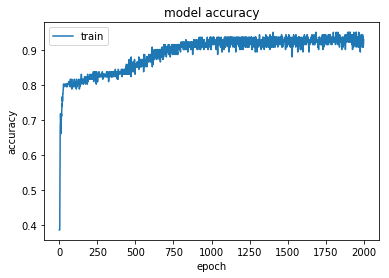

In [262]:
"""
Plotting keras history accuracy and loss 
"""

# plotting accuracies 
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

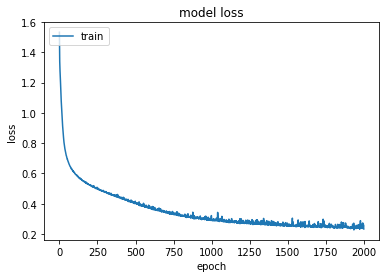

In [263]:
# plottimg loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Conclusion

In conclusion the clear winner here is the neural network!